Akbar
*   Image Classification




In [ ]:
import tensorflow as tf
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-02 16:37:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.09MB/s    in 4m 49s  

2021-05-02 16:41:51 (1.07 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Mengekstrak file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
pip install split_folders

In [ ]:
import splitfolders

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, output ='/tmp/rockpaperscissors', seed=1337, ratio=(0.6, 0.4))
# Membagi dataset
train_dir = os.path.join('/tmp/rockpaperscissors', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors', 'val')

Copying files: 2188 files [00:00, 3516.58 files/s]


In [ ]:
# Melihat direktori data latih
os.listdir('/tmp/rockpaperscissors/train')

['rock', 'paper', 'scissors']

In [ ]:
# Melihat direktori data validasi
os.listdir('/tmp/rockpaperscissors/val')

['rock', 'paper', 'scissors']

In [ ]:
# Membuat direktori rock, paper, scissors pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

# Membuat direktori rock, paper, scissor pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat objek ImageDataGenerator untuk data training
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode= 'nearest')

# Membuat objek ImageDataGenerator untuk data testing
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, # Direktori data latih
        target_size=(150, 150),
        batch_size=32,
        # Menggunakan categorical karena merupakan masalah klasifikasi 3 kelas
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # Direktori data validasi
        target_size=(150, 150),
        batch_size=32,
        # Menggunakan categorical karena merupakan masalah klasifikasi 3 kelas
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [60]:
# Membuat arsitektur CNN dengan Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [62]:
# Compile model dengan Adam (loss function 'categorical_crossentropy')
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [63]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

filepath = '/tmp/rockpaperscissors/train/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5' # Direktori untuk menyimpan callbacks val_accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Untuk mengurangi learning rate setelah 5 epoch
def scheduler(epoch, lr):
    if epoch < 5:
      return lr
    else:
      return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

# Untuk menghentikan training apabila tidak terjadi perubahan pada accuracy setelah 3 epoch
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

callbacks_list = [checkpoint, early_stop, lr_scheduler]

model.fit(
    train_generator,
    steps_per_epoch=35,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=2,
    callbacks=callbacks_list)

Epoch 1/25

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
35/35 - 64s - loss: 0.7960 - accuracy: 0.6170 - val_loss: 0.3461 - val_accuracy: 0.8594

Epoch 00001: val_accuracy improved from -inf to 0.85938, saving model to /tmp/rockpaperscissors/train/weights-improvement-01-0.86.h5
Epoch 2/25

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
35/35 - 62s - loss: 0.2966 - accuracy: 0.8911 - val_loss: 0.3349 - val_accuracy: 0.8906

Epoch 00002: val_accuracy improved from 0.85938 to 0.89062, saving model to /tmp/rockpaperscissors/train/weights-improvement-02-0.89.h5
Epoch 3/25

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
35/35 - 62s - loss: 0.2517 - accuracy: 0.9143 - val_loss: 0.2808 - val_accuracy: 0.9062

Epoch 00003: val_accuracy improved from 0.89062 to 0.90625, saving model to /tmp/rockpaperscissors/train/weights-improvement-03-0.91.h5
Epoch 4/25

Epoch 00004: LearningRateSch

Saving IMG-20210503-WA0005.jpg to IMG-20210503-WA0005 (3).jpg
IMG-20210503-WA0005.jpg
scissors


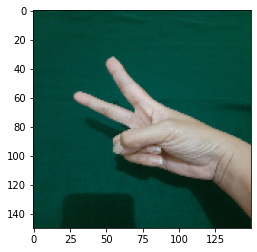

In [68]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # Prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissors')